In [1]:
from math import log
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Problem 1

The odeint solver requires a callable function representing the right hand side of the IVP. Define the function predator_prey() that accepts the current r(t) and w(t) values as a 1d array y, and the current time t, and returns the right hand side of the predator-prey model as a tuple. Use $\alpha$ = 1.0, $\beta$ = 0.5, $\delta$ = 0.75, and $\gamma$ = 0.25 as your growth parameters.

In [4]:
def predator_prey(y, t):
    """Compute right hand side of Predator-Prey model based on rabbit and
    wolf populations at given time.
    
    Parameters:
        y ((2, ) ndarray): A vector representing rabbit and wolf populations 
            at time t.
        t (float): Current time.
        
    Returns:
        (tuple): A tuple corresponding to right hand side of the Predator-
            Prey model.
    """
    #Hyperparameters
    alpha=1.0
    beta=0.5
    delta=0.75
    gamma=0.25
    
    #Get current values of populations
    r = y[0]
    w = y[1]
    rhs = (r*(alpha-beta*w), w*(-delta + gamma*r))
    return rhs

# Problem 2

Use odeint to solve the predator-prey model ODE with initial conditions (r0 , w0 ) = (5, 3) and time ranging from 0 to 20 years. Display the resulting rabbit and wolf populations over time (stored as columns in the output of odeint) on the same plot.

In [44]:
#Solve ODE
y0 = np.array([5, 3])
t = np.linspace(0, 20, 100)
sol = odeint(predator_prey, y0, t)
rs = sol[:, 0]
ws = sol[:, 1]

#Make plots
plt.plot(t, rs, label="Rabbits", color="Blue")
plt.plot(t, ws, label="Wolves", color="Orange")
plt.xlabel("time")
plt.ylabel("Polutation")
plt.title("Basic Predator Prey Model")
plt.legend()
plt.show()

# Problem 3

Similar to problem 1, define the function Lotka_volterra() that takes in the current preditor and prey populations as a 1d array y and the current time as a float t and returns the right hand side of the Lotka-Volterra predator-prey model with $\eta$ = 1/3.

Using odeint, solve the IVP with three different initial conditions $y_0 = (1/2, 1/3)$, $y_0 = (1/2, 3/4)$, and $y_0 = (1/16, 3/4)$ and time domain $t = [0, 13]$. Plot these three solutions on the same graph as the phase portrait and the equilibria (0, 0) and (1, 1).

Since your solutions are being plotted with the phase portrait, plot the two populations against eachother (instead of both individually against time).

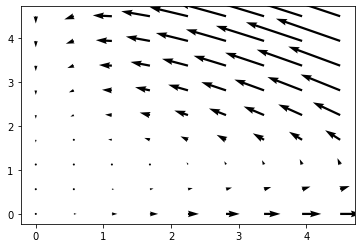

In [14]:
def Lotka_Volterra(y, t):
    """Compute right hand side of Lotka Volterra Predator-Prey model based 
    on rabbit and wolf populations at given time.
    
    Parameters:
        y ((2, ) ndarray): A vector representing rabbit and wolf populations 
            at time t.
        t (float): Current time.
        
    Returns:
        (tuple): A tuple corresponding to right hand side of the Lotka 
            Volterra Predator-Prey model.
    """
    #Hyperparameters
    nu = 1/3
    
    #Get current population values
    U = y[0]
    V = y[1]
    
    #Construct RHS
    rhs = (U*(1-V), nu*V*(U-1))
    return rhs

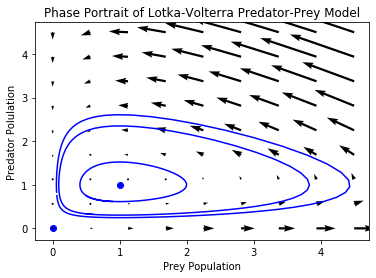

In [23]:
#Initial conditions
y01 = np.array([1/2, 1/3])
y02 = np.array([1/2, 3/4])
y03 = np.array([1/16, 3/4])

#Solve ODEs
t = np.linspace(0, 13, 100)
sol1 = odeint(Lotka_Volterra, y01, t)
preys1 = sol1[:, 0]
preds1 = sol1[:, 1]

sol2 = odeint(Lotka_Volterra, y02, t)
preys2 = sol2[:, 0]
preds2 = sol2[:, 1]

sol3 = odeint(Lotka_Volterra, y03, t)
preys3 = sol3[:, 0]
preds3 = sol3[:, 1]


#Make plots
plt.plot(preys1, preds1, color="Blue")
plt.plot(preys2, preds2, color="Blue")
plt.plot(preys3, preds3, color="Blue")
plt.scatter([1], [1], color="Blue")
plt.scatter([0], [0], color="Blue")
plt.xlabel("Prey Population")
plt.ylabel("Predator Polulation")
plt.title("Phase Portrait of Lotka-Volterra Predator-Prey Model")


# Provided code for plotting phase portrait.
Y1, Y2 = np.meshgrid(np.linspace(0,4.5,25), np.linspace(0,4.5,25))
dU, dV = Lotka_Volterra((Y1, Y2), 0)
Q = plt.quiver(Y1[::3, ::3],Y2[::3, ::3],dU[::3, ::3],dV[::3, ::3])
plt.show()

# Problem 4

Define a new function Logistic_Model() that takes in the current preditor and prey populations y and the current time t and returns the right hand side of the logistic predator-prey model as a tuple.

Use odeint to compute solutions (U, V) of (1.3) for initial conditions (1/3, 1/3) and (1/2, 1/5). Do this for parameter values $\eta$, $\rho$ = 1, 0.3 and also for values $\eta$, $\rho$ = 1, 1.1.

Create a phase portrait for the logistic equations using both sets of parameter values. Plot the direction field, all equilibrium points, and both solution orbits on the same plot for each set of parameter values.

In [25]:
def Logistic_Model(y, t):
    """Compute right hand side of Logistic Predator-Prey model based on
    rabbit and wolf populations at given time.
    
    Parameters:
        y ((2, ) ndarray): A vector representing rabbit and wolf populations 
            at time t.
        t (float): Current time.
        
    Returns:
        (tuple): A tuple corresponding to right hand side of the Logistic 
            Predator-Prey model.
    """
    
    #Get current values of populations
    U = y[0]
    V = y[1]
    
    #Construct rhs
    rhs = (U*(1-U-V), nu*V*(U-rho))
    return rhs

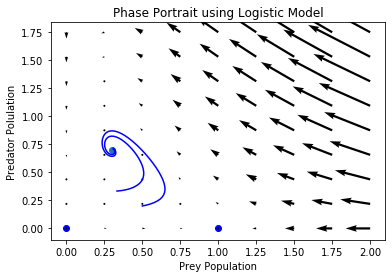

In [42]:
#Hyperparamters
nu = 1
rho = 0.3

#Initial conditions
y01 = np.array([1/3, 1/3])
y02 = np.array([1/2, 1/5])

#Solve ODEs
t = np.linspace(0, 20, 100)
sol1 = odeint(Logistic_Model, y01, t)
preys1 = sol1[:, 0]
preds1 = sol1[:, 1]


sol2 = odeint(Logistic_Model, y02, t)
preys2 = sol2[:, 0]
preds2 = sol2[:, 1]
plt.xlabel("Prey Population")
plt.ylabel("Predator Polulation")
plt.title("Phase Portrait using Logistic Model")

#Make plots
plt.plot(preys1, preds1, color="Blue")
plt.plot(preys2, preds2, color="Blue")
plt.scatter([0], [0], color="Blue")
plt.scatter([1], [0], color="Blue")
plt.scatter([rho], [1-rho])

# Provided code for plotting phase portrait.
Y1, Y2 = np.meshgrid(np.linspace(0,2,25), np.linspace(0,7/4,25))
dU, dV = Logistic_Model((Y1, Y2), 0)
Q = plt.quiver(Y1[::3, ::3],Y2[::3, ::3],dU[::3, ::3],dV[::3, ::3])
plt.show()

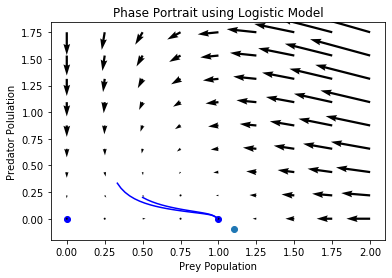

In [43]:
#Hyperparamters
nu = 1
rho = 1.1

#Initial conditions
y01 = np.array([1/3, 1/3])
y02 = np.array([1/2, 1/5])

#Solve ODEs
t = np.linspace(0, 20, 100)
sol1 = odeint(Logistic_Model, y01, t)
preys1 = sol1[:, 0]
preds1 = sol1[:, 1]


sol2 = odeint(Logistic_Model, y02, t)
preys2 = sol2[:, 0]
preds2 = sol2[:, 1]
plt.xlabel("Prey Population")
plt.ylabel("Predator Polulation")
plt.title("Phase Portrait using Logistic Model")

#Make plots
plt.plot(preys1, preds1, color="Blue")
plt.plot(preys2, preds2, color="Blue")
plt.scatter([0], [0], color="Blue")
plt.scatter([1], [0], color="Blue")
plt.scatter([rho], [1-rho])

# Provided code for plotting phase portrait.
Y1, Y2 = np.meshgrid(np.linspace(0,2,25), np.linspace(0,7/4,25))
dU, dV = Logistic_Model((Y1, Y2), 0)
Q = plt.quiver(Y1[::3, ::3],Y2[::3, ::3],dU[::3, ::3],dV[::3, ::3])
plt.show()

# Problem 5

Write the functions forbes() which takes as input F(t) and returns Forbeâ€™s equation. Also write the function energy_balance() which takes as input F (t), L(t), PAL, and EI and returns the energy balance as given in the lab. Use $\rho_F = 9400$, $\rho_L = 1800$, $\gamma_F =3.2$, $\gamma_L =22$, $\eta_F =180$, $\eta_L =230$, $\beta_{AT} =0.14$.


Using forbes() and energy_balance(), define the function weight_odesystem() which takes as input the current fat and lean weights as an array y and the current time as a float t and return the right hand side of the weight change ODE as a tuple.

In [113]:
#Hyperparamters
pf = 9400
pl = 1800
yf = 3.2
yl = 22
nf = 180
nl = 230
Bat = 0.14

def forbes(F):
    """
    Takes as input the Fatty tissue function F and returns the quanty given in equation (3.5)
    
    Parameters:
        F (float): Fatty tissue
    Returns:
        p (float): the proportion of energy balance that results in change in the quantity of lean tissue
    """
    
    #Calculate C
    C = 10.4*pl/pf
    
    #Calculate p
    p = C/(C+F)
    return p

def energy_balance(F, L, PAL, EI):
    """
    Calculates the energy balance as given in equation (3.8)
    
    Parameters:
        F (float): Fatty tissue
        L (float): Lean tissue
        PAL (float): physical activity level
        EI (float): energy intake
        
    Returns:
        EB (function): the Energy balance as a function of time        
    """
    #Numerator
    num = (1/PAL - Bat)*EI-K-yf*F-yl*L
    
    #Denomenator
    p = forbes(F)
    den = nf/pf*(1-p)+nl/pl*p+(1/PAL)
    
    #Energy balance
    EB = num/den
    return EB

def weight_odesystem(y, t):
    """
    Parameters:
        y ((2, ) ndarray): A vector representing current fat and lean weights
        t (float): Current time.
        
    Returns:
        rhs (tuple): tuple representing the RHS of (3.4)
    """
    #Get current values of populations
    F = y[0]
    L = y[1]
    
    #Construct rhs
    p = forbes(F)
    EB = energy_balance(F, L, PAL, EI)
    rhs = ((1-p)*EB/pf, p*EB/pl)
    return rhs

# Problem 6

Consider the initial value problem corresponing to (1.4).

$\frac{dF}{dt} = \frac{(1âˆ’p(t))EB(t)}{\rho_F}$,

$\frac{dL}{dt} = \frac{p(t)EB(t)}{\rho_L}$,

$F(0) = F_0$, 

$L(0) = L_0$.

The provided function fat_mass() returns the fat mass of an individual based on body weight (kg), age (years), height (meters), and sex. Use this function to define initial conditions $F_0$ and $L_0$ for the IVP above: $F_0 =$ fat_mass($args^*$), $L_0 = BW âˆ’ F_0$.

Suppose a 38 year old female, standing 5â€™8â€ and weighing 160 lbs, reduces her intake from 2143 to 2025 calories/day, and increases her physical activity from little to no exercise (PAL=1.4) to exercising to 2-3 days per week (PAL=1.5).


Use the original intake and phyical activity levels to compute K for this system. Then use odeint to solve the IVP. Graph the solution curve for this single-stage weightloss intervention over a period of 5 years. 


Note the provided code requires quantities in metric units (kilograms, meters, days).

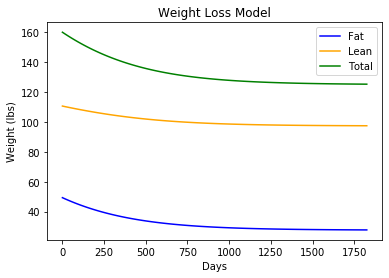

In [123]:
# Provided function.
def fat_mass(BW, age, H, sex):
    BMI = BW / H**2.
    if sex == 'male':
        return BW * (-103.91 + 37.31 * log(BMI) + 0.14 * age) / 100
    else:
        return BW * (-102.01 + 39.96 * log(BMI) + 0.14 * age) / 100
    
#Hyperparameters
BW = 72.575 #160lbs is equivalent to 72.575 kg
sex = "female"
age = 38
height = 1.727 #5'8'' inches is 1.727 meters

#Calculate initial fat mass
F0 = fat_mass(BW, age, height, sex)
L0 = BW-F0

#Calculate K
PAL_init = 1.4
EI_init = 2143
K = (1/PAL_init - Bat)*EI_init-yf*F0 - yl*L0

#Diet values
PAL = 1.5
EI = 2025

#Solve ODE
ts = np.linspace(0, 5*365, 100)
y0 = np.array([F0, L0])
sol = odeint(weight_odesystem, y0, ts)

Fs = sol[:, 0]*1/0.454 #Convert to lbs
Ls = sol[:, 1]*1/0.454 #Convert to lbs
plt.plot(ts, Fs, color="Blue", label="Fat")
plt.plot(ts, Ls, color="Orange", label="Lean")
plt.plot(ts, Fs+Ls, color="Green", label="Total")
plt.xlabel("Days")
plt.ylabel("Weight (lbs)")
plt.title("Weight Loss Model")
plt.legend()
plt.show()

# Problem 7

Modify the preceding problem to handle a two stage weightloss intervention: Suppose for the first 16 weeks intake is reduced from 2143 to 1600 calories/day and physical activity is increased from little to no exercise (PAL=1.4) to an hour of exercise 5 days per week (PAL=1.7). The following 16 weeks intake is increased from 1600 to 2025 calories/day, and exercise is limited to only 2-3 days per week (PAL=1.5).

You will need to recompute F0, and L0 at the end of the first 16 weeks, but K will stay the same. Find and graph the solution curve over the 32 week period.

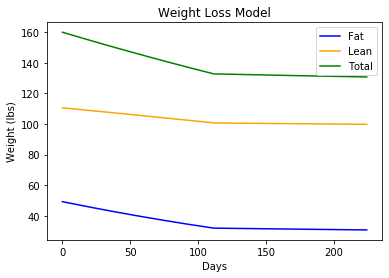

In [125]:
#Hyperparameters
BW = 72.575 #160lbs is equivalent to 72.575 kg
sex = "female"
age = 38
height = 1.727 #5'8'' inches is 1.727 meters

#Calculate initial fat mass
F0 = fat_mass(BW, age, height, sex)
L0 = BW-F0

#Calculate K
PAL_init = 1.4
EI_init = 2143
K = (1/PAL_init - Bat)*EI_init-yf*F0 - yl*L0

#First Stage Diet values
PAL = 1.7
EI = 1600

#Solve ODE
ts = np.linspace(0, 16*7, 100)
y0 = np.array([F0, L0])
sol1 = odeint(weight_odesystem, y0, ts)

Fs = sol1[:, 0]*1/0.454 #Convert to lbs
Ls = sol1[:, 1]*1/0.454 #Convert to lbs


#Second State Diet values
PAL = 1.5
EI = 2025
F0 = Fs[-1]*0.454
L0 = Ls[-1]*0.454

#Solve ODE
ts = np.linspace(0, 16*7, 100)
y0 = np.array([F0, L0])
sol2 = odeint(weight_odesystem, y0, ts)

#Concatenate solutions
Fs = np.concatenate([Fs, sol2[:, 0]*1/0.454])
Ls = np.concatenate([Ls, sol2[:, 1]*1/0.454])

ts = np.linspace(0, 16*7*2, 200)

plt.plot(ts, Fs, color="Blue", label="Fat")
plt.plot(ts, Ls, color="Orange", label="Lean")
plt.plot(ts, Fs+Ls, color="Green", label="Total")
plt.xlabel("Days")
plt.ylabel("Weight (lbs)")
plt.title("Weight Loss Model")
plt.legend()
plt.show()